In [1]:
"""
           Paper: The Core, the Periphery, and the Disaster (R. Jappelli, L. Pelizzon, and A. Plazzi)
"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
cwd = os.getcwd()
os.chdir("/SAFE_NAS/SAFE_DATA/08_OptionMetrics/IvyDBEurope/v3.1/History")

""" Load the data and merge with CovidEU sample """

all_files = os.listdir()
vsurf = [i for i in all_files if i.startswith('INTL.IVYVSURF') and i.endswith('.txt')]
vsurf = sorted(vsurf)

secprc = [i for i in all_files if i.startswith('INTL.IVYSECPRD') and i.endswith('.txt')]
secprc = sorted(secprc)


optprc = [i for i in all_files if i.startswith('INTL.IVYOPPRCD') and i.endswith('.txt')]
optprc = sorted(optprc)

n = "INTL.IVYSECNMD.zip"
names         = pd.read_csv(n, sep='\t', low_memory = True,index_col=None, header=0) 
names.columns = ["Security ID", "Date", "VALOR", "Name", "ISIN"]
names         = names[["Security ID", "VALOR",'Name',"ISIN"]]
 

In [2]:
# List of file names
file_names = vsurf

# Function to read and filter a CSV file
def read_and_filter_csv(file_name):
    df = pd.read_csv(file_name, sep='\t', low_memory=False, index_col=None, header=0)
    df.columns = ["Security ID", "Date", "Days", "Delta", "C/P Flag", "Implied Vol", "Implied Strike", "Implied Premium", "Dispersion", "Currency"]
    filtered_df = df[df['Security ID'] == 504880]
    return filtered_df

# Create a pool of workers
pool = multiprocessing.Pool()

# Read and filter the CSV files in parallel
filtered_data_frames = pool.map(read_and_filter_csv, file_names)

# Close the pool
pool.close()

# Combine the filtered data frames into a single DataFrame
data = pd.concat(filtered_data_frames)

# Reset the index of the main DataFrame
data.reset_index(drop=True, inplace=True)

# Perform additional cleaning steps
step1 = data.merge(names, left_on='Security ID', right_on='Security ID')
step1 = step1.loc[step1['Currency'] == 814]
step1 = step1.loc[step1['Days'] == 30]
step1 = step1.loc[step1['ISIN'] == "EU0009658145"]

# Print the result
print(step1)


         Security ID      Date  Days  Delta C/P Flag  Implied Vol  \
68            504880  20020102    30    -90        P     0.238122   
69            504880  20020102    30    -90        P     0.238122   
70            504880  20020102    30    -85        P     0.240338   
71            504880  20020102    30    -85        P     0.240338   
72            504880  20020102    30    -80        P     0.243281   
...              ...       ...   ...    ...      ...          ...   
3749483       504880  20210930    30     80        C     0.354479   
3749484       504880  20210930    30     85        C     0.417975   
3749485       504880  20210930    30     85        C     0.417975   
3749486       504880  20210930    30     90        C     0.488399   
3749487       504880  20210930    30     90        C     0.488399   

         Implied Strike  Implied Premium  Dispersion  Currency   VALOR  \
68             4109.624         368.4490    0.004169       814  846480   
69             4109.624

In [4]:
file_names2 = optprc

# Function to read and filter a CSV file
def read_and_filter_csv2(file_name):
    df2 = pd.read_csv(file_name, sep='\t', low_memory=False, index_col=None, header=0)
    df2.columns = ["Security ID", "Date", "Option ID", "Exchange", "Currency", "Bid", "Bid time", "Underlying bid", "Ask", "Ask time", "Underlying ask", "Last", "Last time", "Underlying last", "Implied volatility", "Delta", "Gamma", "Vega", "Theta", "Calculation price", "Volume", "Open interest", "Special Settlement", "Reference exchange", "AM Settlement", "Contract size", "Expiry Indicator"]
    filtered = df2[df2['Security ID'] == 504880]
    filtered_df2 = filtered[["Security ID", "Date", "Delta", "Option ID", "Exchange", "Implied volatility", "Volume", "Open interest"]]
    return filtered_df2

# Create a pool of workers
pool2 = multiprocessing.Pool()

# Read and filter the CSV files in parallel
filtered_data_frames2 = pool2.map(read_and_filter_csv2, file_names2)

# Close the pool
pool2.close()

# Combine the filtered data frames into a single DataFrame
data2 = pd.concat(filtered_data_frames2, sort=True)

# Merge with step1 DataFrame
step2 = pd.merge(step1, data2, how='inner', on=['Date', 'Security ID'])

# Filter based on Open interest
step2 = step2.loc[step2["Open interest"] > 0]

# Print the result
print(step2)



           Security ID      Date  Days  Delta_x C/P Flag  Implied Vol  \
0               504880  20020102    30      -90        P     0.238122   
1               504880  20020102    30      -90        P     0.238122   
2               504880  20020102    30      -90        P     0.238122   
3               504880  20020102    30      -90        P     0.238122   
4               504880  20020102    30      -90        P     0.238122   
...                ...       ...   ...      ...      ...          ...   
747575031       504880  20210930    30       90        C     0.488399   
747575032       504880  20210930    30       90        C     0.488399   
747575036       504880  20210930    30       90        C     0.488399   
747575096       504880  20210930    30       90        C     0.488399   
747575098       504880  20210930    30       90        C     0.488399   

           Implied Strike  Implied Premium  Dispersion  Currency   VALOR  \
0                4109.624         368.4490    0

In [5]:
file_names3 = secprc

# Function to read and filter a CSV file
def read_and_filter_csv3(file_name):
    df3 = pd.read_csv(file_name, sep='\t', low_memory=False, index_col=None, header=0)
    df3.columns = ["Security ID", "Date", "Exchange", "Bid", "Ask", "High", "Low", "Open price", "Close price", "Total return", "Adjustment factor", "Cumulative total return factor", "Currency code", "Volume"]
    filtered_df3 = df3[df3['Security ID'] == 504880]
    return filtered_df3

# Create a pool of workers
pool3 = multiprocessing.Pool()

# Read and filter the CSV files in parallel
filtered_data_frames3 = pool3.map(read_and_filter_csv3, file_names3)

# Close the pool
pool3.close()

# Combine the filtered data frames into a single DataFrame
data3 = pd.concat(filtered_data_frames3, sort=True)

# Compute volume weighted price (VWAP) across exchanges and match to options data
def vwap(df):
    q = df["Volume"].values
    p = df["Close price"].values
    return df.assign(vwap=(p * q).sum() / q.sum())

sec = data3[data3["Volume"] != 0]
sec = sec.groupby(["Date", "Security ID"], group_keys=False).apply(vwap)

sec = sec[["Date", "Security ID", "vwap"]]
sec = sec.rename(columns={'vwap': 'Close price'})
sec = sec[sec.duplicated() == False]

# Print the result
print(sec)
 

            Date  Security ID  Close price
105759  20070312       504880       4080.0
105771  20070313       504880       3972.0
105785  20070314       504880       3947.0
105796  20070315       504880       3980.0
105808  20070316       504880       3974.0
...          ...          ...          ...
85237   20210924       504880       4143.0
85247   20210927       504880       4150.0
85257   20210928       504880       4047.5
86295   20210929       504880       4060.0
86324   20210930       504880       4021.5

[3461 rows x 3 columns]


In [6]:
sam = pd.merge(step2,sec,how='inner',left_on=['Date', 'Security ID'],right_on=['Date', 'Security ID'])
sam

,Security ID,Date,Days,Delta_x,C/P Flag,Implied Vol,Implied Strike,Implied Premium,Dispersion,Currency,VALOR,Name,ISIN,Delta_y,Exchange,Implied volatility,Open interest,Option ID,Volume,Close price
0,504880,20070312,30,-90,P,0.141875,4297.936,229.5058,0.006898,814,846480,DJ EURO STOXX50,EU0009658145,0.974954,21,0.919942,2000,150118046,0,4080.0
1,504880,20070312,30,-90,P,0.141875,4297.936,229.5058,0.006898,814,846480,DJ EURO STOXX50,EU0009658145,-0.000211,21,0.822268,2550,150118047,0,4080.0
2,504880,20070312,30,-90,P,0.141875,4297.936,229.5058,0.006898,814,846480,DJ EURO STOXX50,EU0009658145,-0.000318,21,0.550729,5750,150118055,0,4080.0
3,504880,20070312,30,-90,P,0.141875,4297.936,229.5058,0.006898,814,846480,DJ EURO STOXX50,EU0009658145,-0.000362,21,0.482872,1123,150118059,0,4080.0
4,504880,20070312,30,-90,P,0.141875,4297.936,229.5058,0.006898,814,846480,DJ EURO STOXX50,EU0009658145,-0.000387,21,0.451704,72,150118061,0,4080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346939159,504880,20210930,30,90,C,0.488399,3413.557,660.4273,0.178048,814,846480,ESTX50 EUR P,EU0009658145,-0.782440,21,0.129718,176,175354185,1,4021.5
346939160,504880,20210930,30,90,C,0.488399,3413.557,660.4273,0.178048,814,846480,ESTX50 EUR P,EU0009658145,-0.874044,21,0.110201,1,175354186,0,4021.5
346939161,504880,20210930,30,90,C,0.488399,3413.557,660.4273,0.178048,814,846480,ESTX50 EUR P,EU0009658145,-99.990000,21,-99.990000,1,175354190,0,4021.5
346939162,504880,20210930,30,90,C,0.488399,3413.557,660.4273,0.178048,814,846480,ESTX50 EUR P,EU0009658145,-0.009614,21,0.535483,580,175359400,0,4021.5


In [7]:
#Filters follow Kelly and Jang, footnotes 23 and 28

#sam = sam.loc[sam["C/P Flag"] == "P"] #FOR THE TIME BEING, KEEP BOTH PUTS AND CALLS
sam = sam.loc[sam["Implied Premium"] > 0]
len(sam["ISIN"].unique())


sam["aux"] = (sam["Implied Strike"] - sam["Close price"])
sam["Intrinsic Value"] = np.maximum(sam.aux, 0) 
sam["F-V"] = sam["Implied Premium"] - sam["Intrinsic Value"]
sam["Time Value"] = sam["F-V"]/sam["Implied Premium"]
#sam[["Implied Strike","Close price", "aux","Intrinsic Value", "Implied Premium", "F-V","Time Value"]]
sam = sam.loc[sam["Time Value"] >= 0.05]

len(sam["ISIN"].unique())


#Good for puts
sam["Moneyness"] = ((sam["Implied Strike"] - sam["Close price"])/sam["Close price"]) 

#Adjust for calls
sam['Moneyness'] = np.where(sam['C/P Flag'] == 'C', -sam['Moneyness'], sam['Moneyness'])

# Definition in Bakshi et al.
sam["BakshiMoneyness"] = (sam["Implied Strike"]/sam["Close price"]) 


sam["Delta_x"] = sam["Delta_x"]/100
#sam["BidAsk"] = (sam["Ask"] - sam["Bid"])
#sam[["BidAsk", "Ask",  "Bid" ]]
#sam = sam.loc[sam["BidAsk"] > 0]


sam["Embedded Leverage"] = (sam["Delta_x"] * sam["Close price"] /  sam["Implied Premium"]).abs()
sam[["Embedded Leverage", "Delta_x","Close price","Implied Premium"]]
lp = sam["Embedded Leverage"].quantile(0.01)
hp = sam["Embedded Leverage"].quantile(0.99)
sam = sam[(sam["Embedded Leverage"]>lp) & (sam["Embedded Leverage"]<hp) ]

len(sam["ISIN"].unique())


sam[["Implied Vol","Moneyness","Embedded Leverage","Delta_x","Days","Volume", "Open interest"]].describe() 


def vwoi(df):
    q  = df["Open interest"].values
    p  = df["Moneyness"].values
    return df.assign(vwoi=(p * q).sum() / q.sum())

opint = sam[sam["Open interest"] != 0]
opint = opint.groupby(["Date", "ISIN","C/P Flag"], group_keys=False).apply(vwoi)

opint = opint[["Date", "ISIN", "C/P Flag","vwoi"]]
opint = opint.rename(columns={'vwoi': 'OIntWghtd Moneyness'})
opint = opint[opint.duplicated() == False]
os.chdir("/home/external_homes/jappelli")
opint.to_excel("IWMoneyness.xlsx")  
opint.groupby(['C/P Flag']).describe()


# Open interest P/(P+C), in the spirit of Pan and Poteshman (2006, RFS)

def pcratio(df):
    c_open_interest = df.loc[df['C/P Flag'] == 'C', 'Open interest'].sum()
    cp_open_interest = df.loc[df['C/P Flag'].isin(['C', 'P']), 'Open interest'].sum()
    return  df.assign(pcratio= c_open_interest / cp_open_interest)


pcr = sam[sam["Open interest"] != 0]
pcr = pcr.groupby(["Date", "ISIN"], group_keys=False).apply(pcratio)

pcr = pcr[["Date", "ISIN", "pcratio"]]
pcr = pcr.rename(columns={'pcratio': 'P/C Ratio'})
pcr = pcr[pcr.duplicated() == False]
os.chdir("/home/external_homes/jappelli")
pcr.to_excel("PCratio.xlsx")  
pcr.groupby(['ISIN']).describe()

Date                                                      \
               count          mean           std         min         25%   
ISIN                                                                       
EU0009658145  3445.0  2.013709e+07  40427.553938  20070312.0  20100823.0   

                                                 P/C Ratio            \
                     50%         75%         max     count      mean   
ISIN                                                                   
EU0009658145  20140115.0  20170821.0  20210930.0    3445.0  0.406751   

                                                                     
                   std       min       25%       50%       75%  max  
ISIN                                                                 
EU0009658145  0.040523  0.222222  0.392857  0.392857  0.416667  0.8

In [198]:
#Keep only necessary variables

samp = sam.drop_duplicates(subset=["ISIN", "Date",'Implied Premium', 'Implied Strike', 'C/P Flag', "Close price"])
samp = samp[["ISIN", "Date","Delta_x",'Implied Premium', 'Implied Strike', 'C/P Flag', "Close price"]]
 
    
#columns_to_divide = ['Implied Premium', 'Implied Strike', "Close price"]

#samp[columns_to_divide] = samp[columns_to_divide] / 10    
#Compute Option-Implied Skewness


samp.sort_values(['ISIN', 'Date', 'C/P Flag', 'Implied Strike'], inplace=True)

 

samp['Strike_Diff'] = samp.groupby(['ISIN','Date','C/P Flag'])['Implied Strike'].diff().abs()
samp = samp.dropna()

samp.sort_values(['Date', 'ISIN', 'C/P Flag', 'Implied Strike'], inplace=True)
grouped = samp.groupby(['Date', 'ISIN', 'C/P Flag'])
samp['J'] = grouped['Implied Strike'].rank(method='first', ascending=True)
samp['J'] = samp['J'].astype(int)
 
    

# Create separate DataFrames based on 'C/P Flag' values
df_p = samp[samp['C/P Flag'] == 'P']
df_c = samp[samp['C/P Flag'] == 'C']

#Only OTM Options 
df_p = df_p[df_p["Implied Strike"]/df_p["Close price"] <= 1.03 ]
df_c = df_c[df_c["Implied Strike"]/df_c["Close price"] >= 0.97 ]


# Sort 'df_p' by 'Implied Strike' column in ascending order
df_p_sorted = df_p.sort_values(by='Implied Strike', ascending=True)
#
# Sort 'df_c' by 'Implied Strike' column in descending order
df_c_sorted = df_c.sort_values(by='Implied Strike', ascending=False)




df_sorted = pd.concat([df_p_sorted, df_c_sorted])

# Sort the concatenated DataFrame by 'Name', 'Date', and 'C/P Flag' columns
df_sorted = df_sorted.sort_values(by=['ISIN', 'Date', 'C/P Flag'])

# Reset the index of the sorted DataFrame
samp = df_sorted.reset_index(drop=True)


os.chdir("/home/external_homes/jappelli")
samp.to_excel("samp3.xlsx")

samp.head()


def calculate_result(row):
    if row['C/P Flag'] == "C":
          return row['Implied Premium'] * row["Strike_Diff"]*(6*np.log(row['Implied Strike'] /row['Close price'])  - 3*(np.log(row['Implied Strike'] /row['Close price']))**2)/row['Implied Strike']**2
    elif row['C/P Flag'] == "P":
          return row['Implied Premium'] * row["Strike_Diff"]*(6*np.log(row['Close price']/row['Implied Strike'])  + 3*(np.log(row['Close price']/row['Implied Strike'] ))**2)/row['Implied Strike']**2
    
 

samp['PartSum'] = samp.apply(calculate_result, axis=1)

 

samp['TotalSum'] = samp.groupby(['ISIN', 'Date', 'C/P Flag'])['PartSum'].transform('sum')
iskew = samp.drop_duplicates(subset=["ISIN", "Date",  'C/P Flag', 'TotalSum'])
iskew['PartRes'] = np.where(iskew['C/P Flag'] == 'C', iskew['TotalSum'],   -iskew['TotalSum'])
iskew['Cubic'] = iskew.groupby(['ISIN', 'Date'])['PartRes'].transform('sum')
samp.to_excel("samp.xlsx")

iskew = iskew[["ISIN", "Date", 'Cubic']].drop_duplicates(subset=["ISIN", "Date", 'Cubic'])


iskew.head()
iskew.to_excel("iSkew.xlsx")


def calculate_vol(row):
    if row['C/P Flag'] == "C":
        return row['Implied Premium'] * row['Strike_Diff']*(2 * (1 - np.log(row['Implied Strike'] / row['Close price']))) / row['Implied Strike'] ** 2
    elif row['C/P Flag'] == "P":
        return row['Implied Premium'] * row['Strike_Diff']*(2 * (1 + np.log(row['Close price']/row['Implied Strike']))) / row['Implied Strike'] ** 2

    
samp['PartSumVol'] = samp.apply(calculate_vol, axis=1)

samp['TotalSumVol'] = samp.groupby(['ISIN', 'Date', 'C/P Flag'])['PartSumVol'].transform('sum')
ivol = samp.drop_duplicates(subset=["ISIN", "Date",  'C/P Flag', 'TotalSumVol'])
ivol['PartResVol'] = np.where(ivol['C/P Flag'] == 'C', ivol['TotalSumVol'], + ivol['TotalSumVol'])
ivol['VolContr'] = ivol.groupby(['ISIN', 'Date'])['PartResVol'].transform('sum')

ivol = ivol[["ISIN", "Date", 'VolContr']].drop_duplicates(subset=["ISIN", "Date", 'VolContr'])


ivol.head()
ivol.to_excel("iVol_contract.xlsx")


def calculate_X(row):
    if row['C/P Flag'] == "C":
        return  row['Implied Premium'] * row['Strike_Diff'] * (12 * (np.log(row['Implied Strike'] / row['Close price'])**2 - 4 * (np.log(row['Implied Strike'] / row['Close price']))**3))/ row['Implied Strike'] ** 2 
    elif row['C/P Flag'] == "P":
        return  row['Implied Premium'] * row['Strike_Diff'] * (12 * (np.log(row['Close price']/ row['Implied Strike'] )**2 + 4 * (np.log(row['Close price']/row['Implied Strike'] ))**3))/ row['Implied Strike'] ** 2

    
samp['PartSumX'] = samp.apply(calculate_X, axis=1)

samp['TotalSumX'] = samp.groupby(['ISIN', 'Date', 'C/P Flag'])['PartSumX'].transform('sum')
iquart = samp.drop_duplicates(subset=["ISIN", "Date",  'C/P Flag', 'TotalSumX'])
iquart['PartResX'] = np.where(iquart['C/P Flag'] == 'C', iquart['TotalSumX'], + iquart['TotalSumX'])
iquart['XContr'] = iquart.groupby(['ISIN', 'Date'])['PartResX'].transform('sum')

iquart = iquart[["ISIN", "Date", 'XContr']].drop_duplicates(subset=["ISIN", "Date", 'XContr'])


iquart.head()
iquart.to_excel("Quartic_contract.xlsx")


bashik = pd.merge(pd.merge(ivol, iskew, on=['Date', 'ISIN']), iquart, on=['Date', 'ISIN'])

#HP: Rf = 0

bashik["mu"] = -(1/2)*bashik["VolContr"] -(1/6)*bashik["Cubic"] -(1/24)*bashik["XContr"]

#RISK-NEUTRAL OPTION-IMPLIED RETURN SKEWNESS 
bashik["SKEW"] = (bashik["Cubic"] - 3*bashik["mu"]*bashik["VolContr"] + 2*(bashik["mu"])**3)/((bashik["VolContr"] - bashik["mu"]**2)**(1.5))

#RISK-NEUTRAL OPTION-IMPLIED RETURN SKEWNESS 
bashik["KURT"] = (bashik["XContr"] - 4* bashik["mu"]*bashik["Cubic"] + 6*bashik["VolContr"]*(bashik["mu"])**2 - 3*(bashik["mu"])**4)/((bashik["VolContr"] - bashik["mu"]**2)**(2))


bashik.to_excel("Bashik.xlsx")
bashik.describe()

/tmp/ipykernel_371533/288484414.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iskew['PartRes'] = np.where(iskew['C/P Flag'] == 'C', iskew['TotalSum'],   -iskew['TotalSum'])
/tmp/ipykernel_371533/288484414.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iskew['Cubic'] = iskew.groupby(['ISIN', 'Date'])['PartRes'].transform('sum')
/tmp/ipykernel_371533/288484414.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,VolContr,Cubic,XContr,mu,SKEW,KURT
count,3444.000000,3444.000000,3444.000000,3444.000000,3444.000000,3444.000000
mean,0.007763,-0.000424,0.000109,-0.003815,-0.325837,0.773580
std,0.004852,0.000813,0.000401,0.002319,0.130561,0.435478
min,0.001883,-0.012874,0.000003,-0.022406,-2.701437,0.216355
25%,0.004870,-0.000392,0.000016,-0.004317,-0.386638,0.621421
50%,0.006472,-0.000218,0.000030,-0.003203,-0.314021,0.708586
75%,0.008766,-0.000131,0.000066,-0.002415,-0.248426,0.844569
max,0.048050,0.000009,0.007573,-0.000928,0.147558,16.052097


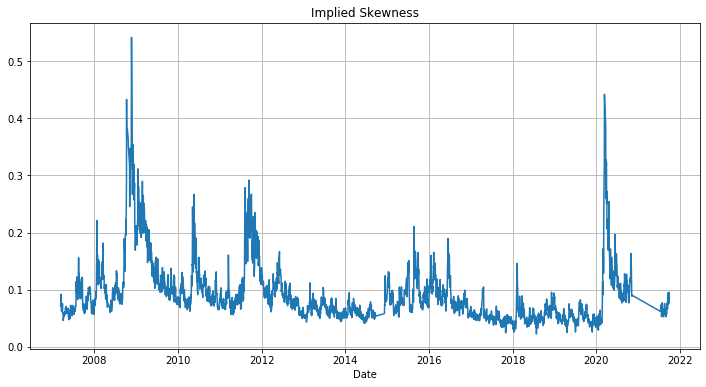

In [229]:
bashik['Date'] = pd.to_datetime(bashik['Date'], format=  "%Y%m%d")


plt.figure(figsize=(12, 6))  
plt.plot(bashik["Date"] , bashik['VolContr'] *12)
plt.xlabel('Date')
#plt.ylabel('EURO STOXX')
plt.title('Implied Skewness')
plt.grid(True)
plt.show()

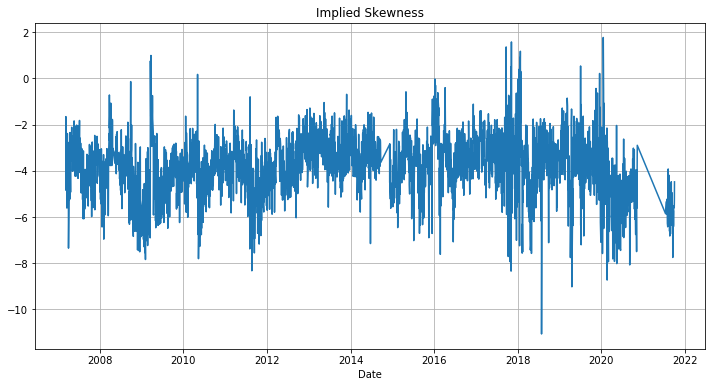

In [231]:
bashik['Date'] = pd.to_datetime(bashik['Date'], format=  "%Y%m%d")


# Define the upper percentile threshold (e.g., 99th percentile)
#upper_threshold = bashik['SKEW'].quantile(0.1)

# Drop rows with values exceeding the threshold
#bashik = bashik[bashik['SKEW'] >= upper_threshold]

plt.figure(figsize=(12, 6))  
plt.plot(bashik["Date"] , bashik['SKEW'] *12)
plt.xlabel('Date')
#plt.ylabel('EURO STOXX')
plt.title('Implied Skewness')
plt.grid(True)
plt.show()

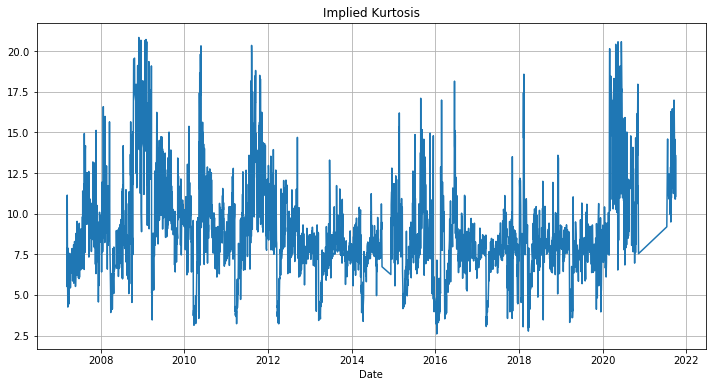

In [232]:
bashik['Date'] = pd.to_datetime(bashik['Date'], format=  "%Y%m%d")

# Define the upper percentile threshold (e.g., 99th percentile)
upper_threshold = bashik['KURT'].quantile(0.999)

# Drop rows with values exceeding the threshold
bashik = bashik[bashik['KURT'] <= upper_threshold]

plt.figure(figsize=(12, 6))  
plt.plot(bashik["Date"], bashik['KURT'] *12)
plt.xlabel('Date')
#plt.ylabel('EURO STOXX')
plt.title('Implied Kurtosis')
plt.grid(True)

# Add a vertical line at October 2008
oct_2008 = mdates.datestr2num('2008-10-01')
#plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2020-12-31'))

#plt.axvline(oct_2008, color='black', linestyle='-.')

plt.show()

In [204]:
bashik.describe()

,VolContr,Cubic,XContr,mu,SKEW,KURT
count,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000
mean,0.007743,-0.000415,0.000103,-0.003806,-0.323988,0.763392
std,0.004810,0.000770,0.000362,0.002302,0.117252,0.277114
min,0.001883,-0.012874,0.000003,-0.022406,-1.104242,0.216355
25%,0.004869,-0.000391,0.000016,-0.004315,-0.385919,0.621361
50%,0.006469,-0.000217,0.000030,-0.003202,-0.313783,0.708550
75%,0.008754,-0.000131,0.000065,-0.002415,-0.248254,0.844064
max,0.048050,0.000009,0.007573,-0.000928,0.147558,3.651044
